##<font color='navy' face='Helvetica' size=12pt>Introduction to Natural Language Processing</font>

<font color='crimson'>**Objective:** use speech and words along with computer run algorithms.

<span style="font-family:Calibri; color:darkblue; font-size:18pt;">Examples of projects/research with NLP:</span>

<font color='blue'>*Sentiment Analysis*</font> - How positive or negative is text about a topic?

<font color='blue'>*Prediction*</font> - What genres should Netflix classify a movie as to maximize views? Based on product reviews, can we predict the star rating of a product?

<font color='blue'>*Translation*</font> - Recognize words in one language to provide similar words in another.

**Playground:** https://www.deepl.com/translator


<font color='blue'>*Summarization*</font> - Take a long document and produce a shorter one (a synthesis) without losing meaningful information.


<font color='forestgreen'>**Methods:**</font> <span style="font-family:Calibri; color:red; font-size:12pt;">The main idea is to quantify the occurrence of relevant words and, based on the context, to map them into vectors. That is to say that we want to create mathematically representable quantities from words and text; they will serve as features for data analysis. One approach is separate the text data into sentences and then sentences can be used to extract (key) words and expressions.</span>

###**Regular Expressions (regex)**

Goal: provide a language that allows us to search for different text strings.

For example, Regular Expressions (frequently called “regex”) allows us to label all tweets with a “1” if they contain the following list of words:

- college
- College of
- colleges
- The College

The idea is to detect that in all expressions above we have the same concept "college".



<font color='blue' face='Calibri' size=5pt>Examples of common REGEX patterns</font>

**[tT]**imber  - would match lower or uppercase T

**[A-Z]** - would match any capital character

**[a-z]** - would match any lowercase character

**[0-9]** - would match any single number (i.e., 9)

**[^A-Z]** - would match anything that isn’t an uppercase letter.

**\w** - would match any letter.

A comprehensive manual on regex can be found here:
https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html

In [ ]:
# import regex in Python
import re

What is a pattern for NLP? Answer: A pattern is a sequence of ASCII characters.

In [ ]:
pattern = "[cC]hoco"
pattern2 = "[cC]ustard"
pattern3 = "cake"
sentence1 = "Chocolate is very delicious."
sentence2 = "This new recipe deliciously implemented a new idea about the texture of the chocolate."
sentence3 = "Chocolate has too many calories and we have to be careful."
if re.search(pattern2, sentence3):
  print("Match!")
else: print("Not a match!")

Not a match!


In [ ]:
pattern

'[cC]hoco'

###An example for replacing the spaces between words:

In [ ]:
text = "This chocolate is delicious but it may have too many calories, such as 400."
re.sub('[^a-zA-Z0-9]','&',text)

'This&chocolate&is&delicious&but&it&may&have&too&many&calories&&such&as&400&'

In [ ]:
text = "This chocolate is delicious but it may have too many calories, such as five hundred."

In [ ]:
# here we can separate the different words
text.split()

['This',
 'chocolate',
 'is',
 'delicious',
 'but',
 'it',
 'may',
 'have',
 'too',
 'many',
 'calories,',
 'such',
 'as',
 'five',
 'hundred.']

In [ ]:
info = text.split(sep=' ')

In [ ]:
# info is now an array of different words
info[2]

'is'

###An example for matching a patttern (a sequence of characters)

In [ ]:
pattern = r"[cC]hoco"
sequence = "Chocolate is delicious"
if re.match(pattern, sequence):
  print("Match!")
else: print("Not a match!")

Match!


### Rooting words is very important ! (in short, an identifier of the meaning of the word)

In [ ]:
pattern = r"good for you"
sentence = "Chocolate is delicious and good for you"
if re.search(pattern, sentence):
  print("Match!")
else: print("Not a match!")

Match!


###Example:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AMHbSgq3MHcv8Q8ljnHvl5IkxTKkzGkx'
width='600px' />
<figcaption>Data from Twitter</figcaption></center>
</figure>


In [ ]:
text = """Rep. Stephanie Murphy Verified account @RepStephMurphy Aug 30 More Celebrating 100yrs of coeducation at @williamandmary,
        it was a true honor to return to my alma mater & join its first female president, Katherine Rowe, to welcome students at their convocation.
        I spoke about the power of patriotism & the urgent need for active, engaged citizens."""

In [ ]:
pattern = r"[cC]elebrat"
if re.search(pattern, text):
  print("Match!")
else: print("Not a match!")

Match!


In [ ]:
pattern = r"\welebrat[a-z]+"
if re.search(pattern, text):
  print("Match!")
else: print("Not a match!")

Match!


<font face='Calibri' color='blue' size=5pt>The Bag of Words model (BoW)</font>

**Main Goal:** use concurrences within context and counts of keywords to make predictions.

**Observation:** there are many words that do not matter (such as prepositions or definite and indefinite articles).

**Important:** each word can be translated into a binary value of occurrence.

<span style="font-family:Calibri; color:darkblue; font-size:5pt;">Analog Example:</span>

*Statement 1*: Jurassic World was the pinnacle of human achievement.

*Statement 2*: Human kind would be better without Jurassic World.


<figure>
<center>
<img src='https://drive.google.com/uc?id=1EUGNgop58BOOhFGHR3iKs5gXbrji6jEM'
width='600px' />
<figcaption>What is the difference in the statements above?</figcaption></center>
</figure>



**Method**: we discard the *stopwords* such as articles, prepositions, verbs and retain the *corpus* (important words or *roots* of important words).



A simple model based on this data:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1-uuXfXiYlmub8DauhxhYYCP2TKqfdvoB'
width='600px' />
<figcaption>The differences can be highlighted by using a count/vectorizer method</figcaption></center>
</figure>

**Main idea:** analyze differences and co-occurrencies.

**Known Problems:**

 - If some sentences are much longer in length, the vocabulary would increase and as such, the length of the vectors would increase; this is a dimensionality problem.
 - The new sentences may contain more different words from the previous sentences.
 - The vectors would also contain many zeros, thereby resulting in a sparse matrix.
 - No information on the grammatical structure or the actual ordering of the words is being used.

**Possible Solution:** Term Frequency-Inverse Document Frequency (TF-IDF)

The term frequency-inverse document frequency is a measure that quantifies the importance of a word in the context of a document or a *corpus*.

The *term-frequency* of a word is the relative frequency of the term in the context of the document.

$$\text{TF}(t,d):=\frac{\text{# of times the term appears in the document}}{\text{# of terms in the document }}$$


The *inverse document frequency* is defined as:

$$\text{IDF}(t,d):=\log\left(\frac{\text{# of documents}}{\text{# of documents with term } t}\right)$$

Our quantification of relative importance is defined as the product between TF and IDF.

TF-IDF gives larger values for less frequent words and is high when both IDF and TF values are high, for instance the word is rare in all the documents combined but frequent in a single document.

A good Python example can be found here:

https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76


In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import re

In [ ]:
text = open("GreatGatsby.txt").read()

In [ ]:
text[455:555]

' you are located\nbefore using this eBook.\n\nTitle: The Great Gatsby\n\n\nAuthor: F. Scott Fitzgerald\n\nRe'

In [ ]:
len(text)

289803

<font face="Calibri" color='navy' size=4pt>We can extract all the sentences (based on punctuation):</font>

In [ ]:
# an important step of Text pre-processing
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

In [ ]:
dataset[233]

'besides nick s going to look after her aren t you nick '

In [ ]:
# this is the 100th sentence
dataset[99]

' the whole town is desolate '

What do you notice? There are no capital letters, no punctuation (because the computer does not need them).

We can also determine how frequent are the different words.

In [ ]:
# we can count the occurrencies of different words
# Creating the Bag of Words model
word2count = {} # this is a list
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
word2count.get('gift')

1

In [ ]:
word2count.get('computer')

2

This means that the word "ghost" appeared 95 time.

In [ ]:
word2count.get('the') # however 'the' is a stopword so it should NOT be counted!!

2593

<font face="Calibri" color='navy' size=4pt>We can determine what are the most frequent words, for example:</font>

In [ ]:
# the top 100 most frequent words
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

['the',
 'and',
 'a',
 'i',
 'of',
 'to',
 'in',
 'he',
 'was',
 'that',
 'it',
 'you',
 'his',
 's',
 'with',
 'at',
 't',
 'she',
 'her',
 'had',
 'on',
 'for',
 'me',
 'as',
 'him',
 'gatsby',
 'but',
 'from',
 'my',
 'we',
 'all',
 'said',
 'there',
 'out',
 'this',
 'up',
 'an',
 'tom',
 'daisy',
 'or',
 'were',
 'they',
 'if',
 'into',
 'about',
 'one',
 'by',
 'when',
 'what',
 'have',
 'then',
 'over',
 'be',
 'so',
 'is',
 'like',
 'down',
 'who',
 'man',
 'no',
 'back',
 'came',
 'not',
 'been',
 'any',
 'some',
 'do',
 'd',
 'just',
 'little',
 'now',
 'know',
 'don',
 'gutenberg',
 'house',
 'before',
 'went',
 'after',
 'eyes',
 'project',
 'old',
 'didn',
 'come',
 'looked',
 'got',
 'mr',
 'see',
 'time',
 'other',
 'them',
 'can',
 'away',
 'your',
 'way',
 'll',
 'wilson',
 'm',
 'more',
 'get',
 'new']

Indeed this is a story about "Gatsby" and "money"

Important: we want to discard all the unimportant words (as known as "stopwords").

In [ ]:
# Stopword dictionary
from nltk.corpus import stopwords
nltk.download('stopwords')
# For stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset[300]

'she smiled slowly and walking through her husband as if he were a ghost shook hands with tom looking him flush in the eye '

In [ ]:
txt = re.sub('[^a-zA-Z0-9 ]','',dataset[300])
# Make everything lower case
txt = txt.lower()
# Make it a list of words
txt = txt.split()
# Get all the stop words out
txt = [word for word in txt if not word in set(stopwords.words('english'))]
# Stem the words
#txt = [stemmer.stem(word) for word in txt]
# Put it all back together and look at the result
' '.join(txt)

'smiled slowly walking husband ghost shook hands tom looking flush eye'

..and we want to do this for every sentence in the book:

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
corpus = [] # the name 'corpus' refers to the sentences after we throwed all stopwords and we rooted the remaining ones
for i in range(len(dataset)):
    txt = re.sub('[^a-zA-Z0-9 ]','',dataset[i])
    txt = txt.lower()
    txt = txt.split()
    txt = [word for word in txt if not word in set(stopwords.words('english'))]
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = ' '.join(txt)
    corpus.append(txt)

In [ ]:
corpus

In [ ]:
# we can count the occurrencies of different words in the corpus
# Creating the Bag of Words model
word2count = {}
for data in corpus:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
# .. and get the top 100 most frequent in the corpus:
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

## Application to Amazon customer reviews

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
# Stopword dictionary
from nltk.corpus import stopwords
nltk.download('stopwords')
# For stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
# let's import ML algorithms for classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts, KFold
from sklearn.metrics import accuracy_score as ac, confusion_matrix as cm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# this data is available via Kaggle
df = pd.read_csv('drive/MyDrive/Data Sets/amazon_reviews.csv', quoting=2 )
# Extract the ratings and text reviews
data = df[['reviews.text', 'reviews.rating']].dropna().reset_index(drop=True)

reviews = data['reviews.text']
y = data['reviews.rating']

In [3]:
data

,reviews.text,reviews.rating
0,I initially had trouble deciding between the p...,5.0
1,Allow me to preface this with a little history...,5.0
2,I am enjoying it so far. Great for reading. Ha...,4.0
3,I bought one of the first Paperwhites and have...,5.0
4,I have to say upfront - I don't like coroporat...,5.0
...,...,...
1172,This is not the same remote that I got for my ...,3.0
1173,I have had to change the batteries in this rem...,1.0
1174,"Remote did not activate, nor did it connect to...",1.0
1175,It does the job but is super over priced. I fe...,3.0


In [ ]:
data.loc[2,'reviews.text']

"I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet."

In [ ]:
y[493]

5.0

To learn more about the data:   

https://www.kaggle.com/bittlingmayer/amazonreviews

###<font size=8> Pre-Processing

We assume that, up to this point, we imported the data (both reviews and corresponding start ratings.) The reviews are stored in a variable that has the same name.

We are considering a step process:



*   change all characters to lower case
*   remove punctuation
*   separate the different words in each review
*   discard the "stopwords"
*   lemmatize or stem the remaining words


In [ ]:
reviews[0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [ ]:
allreviews = [] # we designate a variable for holding the pre-processed reviews
for review in reviews:
    txt = re.sub('[^a-zA-Z0-9 ]','',review) # removes all special characters and punctuation
    txt = txt.lower() # we make all letters lower case
    txt = txt.split() # extracting the different words
    txt = [word for word in txt if not word in set(stopwords.words('english'))] # we throw all the non-important words
    txt = [stemmer.stem(word) for word in txt] # this would be the application of Porter Stemmer
    #txt = [lemmatizer.lemmatize(word) for word in txt] # we make unique identifiers to words that have common roots
    txt = ' '.join(txt) # we assemble back the remaing rooted words into a pre-processed review
    allreviews.append(txt)

In [ ]:
allreviews[0]

'initially trouble deciding paperwhite voyage review le said thing paperwhite great spending money go voyagefortunately friend owned ended buying paperwhite basis model 300 ppi 80 dollar jump turn pricey voyage page press isnt always sensitive fine specific setting dont need auto light adjustmentits week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either youll changing light level certain time day every readingalso glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping service'

In [ ]:
allreviews[0]

'initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyagefortun friend own end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press isnt alway sensit fine specif set dont need auto light adjustmentit week love paperwhit regret touch screen recept easi use keep light specif set regardless time day case hard chang set either youll chang light level certain time day everi readingalso glad went intern ship option amazon extra expens deliveri time track didnt need worri custom may use third parti ship servic'

In [ ]:
# prepare the labels for classification
yb = (y>=4) + 0

In [ ]:
yb[8]

1

In [ ]:
# here we show how words can be changed into numbers
X_raw = cv.fit_transform(allreviews)
X = X_raw #.toarray()

In [ ]:
# critical thinking: what does the number of columns in X represent below?
X.shape

(1177, 6108)

In [ ]:
# here X is a sparse matrix
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

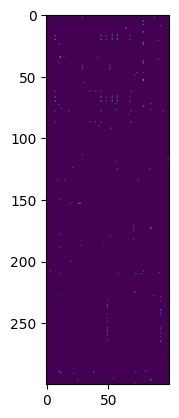

In [ ]:
# it does not help to try to visualize X
plt.imshow(X[100:400,200:300])

## Apply ML Algorithms for predicting the ratings

In [ ]:
# first step, we can use the whole data
# we need to designate a model
model = LogisticRegression(solver='saga',penalty='l2',max_iter=1000)

In [ ]:
# we need to fit the model on our data
model.fit(X,yb)
model.score(X,yb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9643160577740016

In [ ]:
# we can compute the confusion matrix as well:
pd.DataFrame(data=cm(yb,model.predict(X)),columns=['at least 4 stars', 'less than 4 stars'],index=['at least 4 stars', 'less than 4 stars'])

,at least 4 stars,less than 4 stars
at least 4 stars,166,34
less than 4 stars,8,969


In [ ]:
model = SVC(kernel='rbf',gamma=0.01,C=2)
model.fit(X,yb)

SVC(C=2, gamma=0.01)

In [ ]:
model.score(X,yb)

0.9549702633814783

In [ ]:
cm(yb,model.predict(X))

array([[147,  53],
       [  0, 977]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
prep1 = TfidfVectorizer()
X_raw = prep1.fit_transform(allreviews)
X = X_raw.toarray()

In [ ]:
X[10,X[10]!=0]

array([0.18617881, 0.18617881, 0.18617881, 0.18617881, 0.17594777,
       0.18617881, 0.18617881, 0.18617881, 0.18617881, 0.19439728,
       0.35189553, 0.18617881, 0.18617881, 0.11784695, 0.18617881,
       0.18617881, 0.37235762, 0.18617881, 0.18617881, 0.17594777,
       0.18617881, 0.18617881, 0.18617881, 0.18617881])

In [ ]:
X = X_raw

In [ ]:
model.fit(X,yb)
model.score(X,yb)

0.8827527612574342

In [ ]:
model = SVC(kernel='rbf',gamma=0.01,C=2)
model.fit(X,yb)

SVC(C=2, gamma=0.01)

In [ ]:
confusion_matrix(yb,model.predict(X))

array([[ 38, 398],
       [  0, 741]])

In [ ]:
# for the number of stars we say 5 star is a hit and less than 5 is a miss
yb = y.where(y==5, other=0).where(y<5, other=1)

In [ ]:
sum(yb)

741.0

In [ ]:
yb.shape

(1177,)

In [ ]:
yb

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1172    0.0
1173    0.0
1174    0.0
1175    0.0
1176    0.0
Name: reviews.rating, Length: 1177, dtype: float64

### Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc

Xtrain,Xtest,ytrain,ytest = tts(X,yb,random_state=123,test_size=0.25)
cls = LogisticRegression(random_state=123, solver='lbfgs')
cls.fit(Xtrain,ytrain)
ypred = cls.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
pd.DataFrame(cm, columns=['Not 5', '5'], index =['Not 5', '5'])

,Not 5,5
Not 5,41,67
5,20,167


In [ ]:
acc(ytest,ypred)

0.7050847457627119

In [ ]:
# the input features are based on the Bag of Words Model
# the input features matrix X is sparse

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [ ]:
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
pd.DataFrame(cm, columns=['Not 5', '5'], index =['Not 5', '5'])

,Not 5,5
Not 5,65,43
5,60,127


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls.fit(Xtrain,ytrain)
ypred = cls.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
pd.DataFrame(cm, columns=['Not 5', '5'], index =['Not 5', '5'])

,Not 5,5
Not 5,73,35
5,85,102


In [ ]:
acc(ytest,ypred)

0.5932203389830508

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


cls = RandomForestClassifier(random_state=310, max_depth=100, n_estimators = 100)
cls.fit(Xtrain,ytrain)
ypred = cls.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
pd.DataFrame(cm, columns=['Not 5', '5'], index =['Not 5', '5'])

,Not 5,5
Not 5,45,63
5,14,173


In [ ]:
acc(ytest,ypred)

0.7389830508474576

## Application to wine ratings

In [ ]:
import matplotlib.pyplot as plt

from nltk import download
download('stopwords')

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%%time
wine_data = pd.read_csv('winemagdata130kv2.csv',quoting=2)
wines = wine_data[["description","points"]]
wines_subset = wines.sample(1000,random_state=1693).reset_index(drop=True)
corpus = []

for i in range(0,len(wines_subset)):
    wine_descriptions = re.sub('[^a-zA-Z0-9 ]','',wines_subset["description"][i])
    wine_descriptions=wine_descriptions.lower()
    wine_descriptions = wine_descriptions.split()
    wine_descriptions = [word for word in wine_descriptions if not word in set(stopwords.words('english'))]
    stemmer = PorterStemmer()
    wine_descriptions = [stemmer.stem(word) for word in wine_descriptions]
    wine_descriptions = " ".join(wine_descriptions)
    corpus.append(wine_descriptions)

FileNotFoundError: ignored

In [ ]:
%%time
countVec = CountVectorizer()
X_raw = countVec.fit_transform(corpus)
X = X_raw.toarray()

In [ ]:
#### Visualize the distribution of the wine ratings (points)
n, bins, patches = plt.hist(wines_subset["points"].values,10,density=1,facecolor='green',alpha=0.7)

In [ ]:
y = wines_subset["points"]
y = y.where(y>90,other=0).where(y<=90,other=1).values

In [ ]:
X_train, X_test, Y_train, Y_test = tts(X,y,test_size=0.25,random_state=1693)
#scale_X = StandardScaler()
#X_train = scale_X.fit_transform(X_train)
#X_test = scale_X.transform(X_test)
classifier = LogisticRegression(random_state=1693,solver='lbfgs')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
spc = ['Bad','Good']
cm = confusion_matrix(Y_test,Y_pred)
pd.DataFrame(cm, columns=spc, index=spc)